# Filtering

**Download Images** >> 
Let's download some images we are going to try on! 
You can also download and use your images. 

In [1]:
# run this cell to download images
!rm -r ai4all2020-michigan
!git clone https://github.com/ddshan/ai4all2020-michigan
!cp -r ai4all2020-michigan/* . && echo "=== Download Images Successfully ==="

rm: cannot remove 'ai4all2020-michigan': No such file or directory
Cloning into 'ai4all2020-michigan'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 22 (delta 5), reused 20 (delta 3), pack-reused 0
Unpacking objects: 100% (22/22), done.
=== Download Images Successfully ===


# Part1: Image Filtering

OpenCV provides a function, **cv2.filter2D()**, to filter an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel can be defined as follows:

<center>
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/220e403e44b16ea8e05d350c4ce69e9aedff5bd1.png" width="200"> 
</center>

Filtering with the above kernel results in the following being performed: for each pixel, a 5x5 window is centered on this pixel, all pixels falling within this window are summed up, and the result is then divided by 25. This equates to computing the average of the pixel values inside that window. This operation is performed for all the pixels in the image to produce the output filtered image. 

image shape (512, 512, 3)


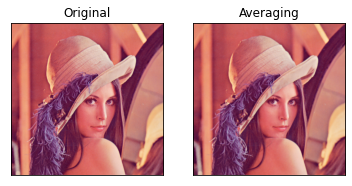

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lana.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(f'image shape', img.shape)

kernel = np.ones((2, 2), np.float32) / (2*2) # try differnt filters
dst = cv2.filter2D(img, -1, kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Part2: Image Blurring/Smoothing

**2.1 Averaging Filtering**

This is done by convolving the image with a normalized box filter (each element is the same, the sum of all elements = 1). It simply takes the average of all the pixels under kernel area and replaces the central element with this average. This is done by the function **cv2.blur()** or **cv2.filter2D()**. 

We are going to compare **cv2.blur()** with **cv2.filter2D()** to check that they can do the same effect to the image.


**Step 1**: Read in the "lana.png" image and display it:

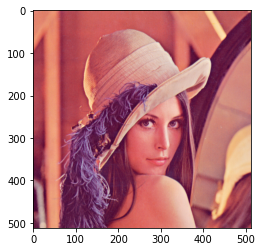

In [6]:
# Load a color image
img = cv2.imread('lana.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

**Step 2**: Let's try applying the box filter to this image. We'll do it in two 
ways: first, let's use the OpenCV implementation, **cv2.blur()**. We'll use a larger kernel (9x9) so that you can see it clearly. 

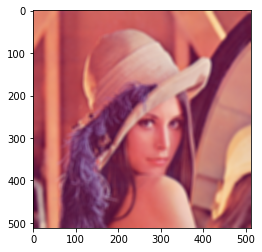

In [8]:
blur = cv2.blur(img, (9,9))
plt.imshow(blur)
plt.show()

**Step 3**: Now, let's implement that same filter as a matrix, and then apply it using OpenCV tools, **cv2.filter2D()**. 

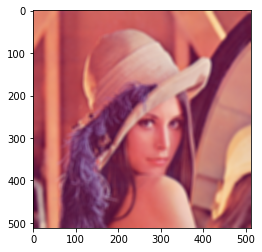

In [9]:
our_kernel = np.ones((9,9),np.float32)/(9*9)
blur2 = cv2.filter2D(img,-1,our_kernel)
plt.imshow(blur2)
plt.show()

**Step 4**: As a sanity check, let's visualize the difference between the two blurred images. There should be no difference!

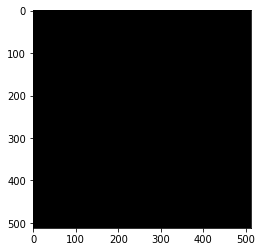

In [10]:
blur_difference = blur2 - blur
plt.imshow(blur_difference)
plt.show()

**Step 5**: To be doubly sure, let's sum the difference at each pixel value and print it. 

In [11]:
difference_sum = blur_difference.sum()
print(difference_sum)

0


**2.2 Gaussian Filtering**

In this approach, instead of a box filter consisting of equal filter elements, a Gaussian kernel is used. In OpenCV, it is done with the function, **cv2.GaussianBlur()**. We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian filtering is highly effective in removing Gaussian noise from the image.


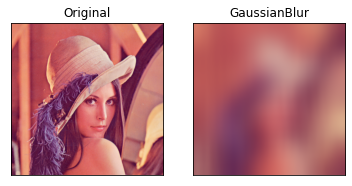

In [19]:
# Load a color image
img = cv2.imread('lana.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blur = cv2.GaussianBlur(img, (251,251), 0) #  change the filter to check differnt effect

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.show()

**2.3 Median Filtering**

Here, the function **cv2.medianBlur()** computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise. 

One interesting thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image. However this is not the case in median filtering, since the central element is always replaced by some pixel value in the image. This reduces the noise effectively. The kernel size must be a positive odd integer.


example 1

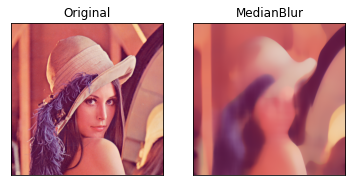

In [30]:
# Load a color image
img = cv2.imread('lana.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

median = cv2.medianBlur(img, 51) #  change the filter to check differnt effect

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('MedianBlur')
plt.xticks([]), plt.yticks([])

plt.show()

example 2: an salt-and-pepper image

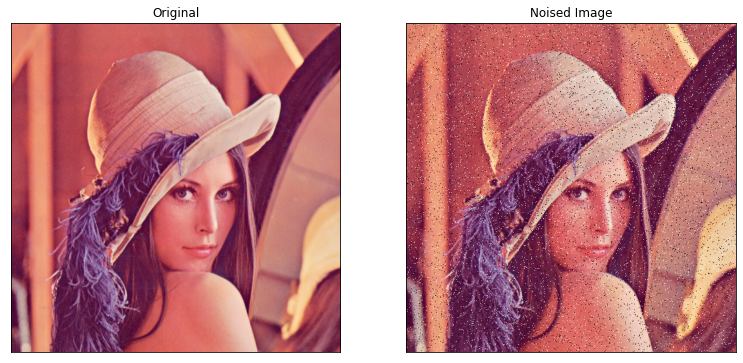

In [31]:
# Load a color image and add noise on it
img = cv2.imread('lana.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(image.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

noise_img = sp_noise(img, 0.05)
# noise_img = cv2.cvtColor(noise_img, cv2.COLOR_BGR2RGB)
# cv2.imwrite('noised_lana.png', noise_img)

plt.figure(figsize=(13,8))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(noise_img),plt.title('Noised Image')
plt.xticks([]), plt.yticks([])
plt.show()

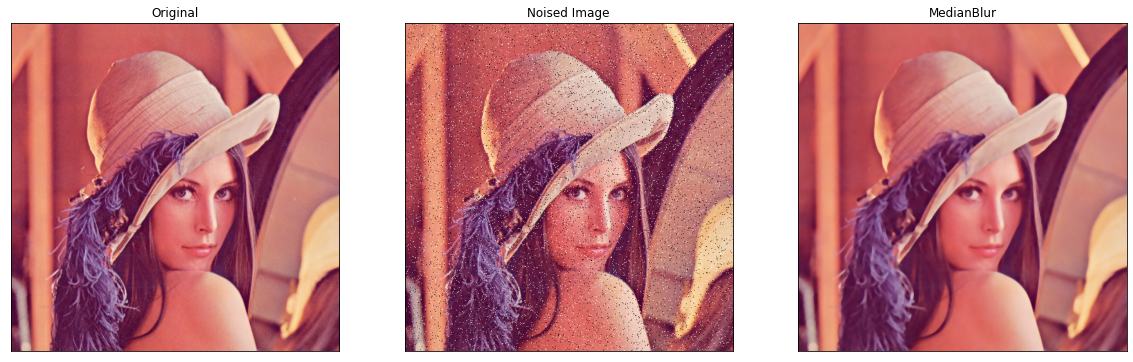

In [33]:

median2 = cv2.medianBlur(img, 5) #  change the filter to check differnt effect

plt.figure(figsize=(20,8))
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(noise_img),plt.title('Noised Image')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(median2),plt.title('MedianBlur')
plt.xticks([]), plt.yticks([])
plt.show()

### Complete the following tasks: 
Let's do some experiments on lana.png with what we have learnt today.



(1) Use Averaging and GaussianBlur filters on Salt-and-Pepper noised image and compare the results. Which one does the best?

(2) Use filters to shift the image to the right by 10 pixels. 

(3) There are other useful filters, such as Sobel filer. See https://en.wikipedia.org/wiki/Kernel_(image_processing) for a (very) small sample. 
Now, look up the Sobel filter and implement one in the x-direction or y-direction.

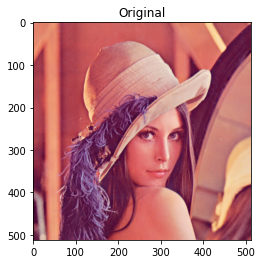

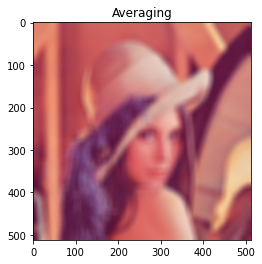

In [35]:
## To be removed for actual assignment 
img = cv2.imread('lana.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original')
plt.show()





# Averaging Filtering
# call cv2.blur() function here, check code above for reference and change parameters to compare results
# avg = 
avg = cv2.blur(img, (19,19))
plt.imshow(avg)
plt.title('Averaging')
plt.show()




# Gaussian Filtering
# call cv2.GaussianBlur() function here, check code above for reference and change parameters to compare results
# gauss = 
# plt.imshow(gauss)
# plt.title('GaussianBlur')
# plt.show()




# Image Shifting 
# direction = -1 # 0 if right, -1 if left 
# k = 100

# shift = np.zeros((1, 2*k + 1), dtype=np.float32)
# shift[0, direction] = 1.
# img_shifted = cv2.filter2D(img, -1, shift)
# plt.imshow(img_shifted)
# plt.title('Shift')
# plt.show()
# print(f'shift filer =', shift)
# print(img.shape, img_shifted.shape)

# OpenCV default border type: reflect, fedcba|abcdef